In [2]:
import numpy as np
from scipy.io import loadmat, wavfile
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
from Signal_Analysis.features.signal import get_F_0, get_HNR
from importlib import reload
from audiostretchy.stretch import stretch_audio
import librosa as lib
import os.path
import speech_recognition as sr
# tools work in progress
import tools
reload(tools)
from tools import *

plt.style.use("dark_background")
mpl.rcParams["lines.linewidth"] = 0.5
plt.close("all")

little turtles remains were reentered
a b c d e f g h i j k
why were you away a year Roy
frame length    : 3969 samples
frame length    : 0.09 seconds
number of frames: 453


c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w


output_HNRsplit/alphabet.wav


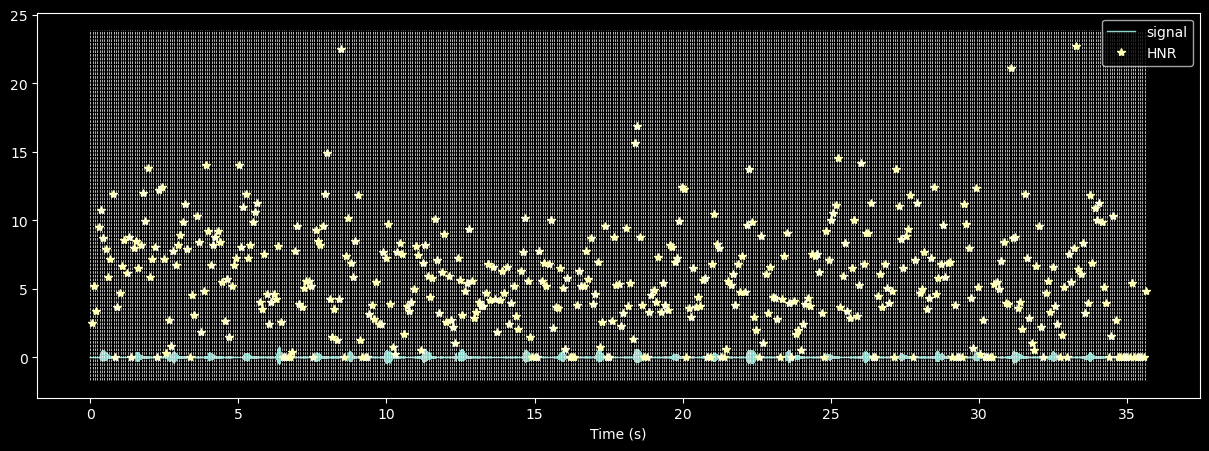

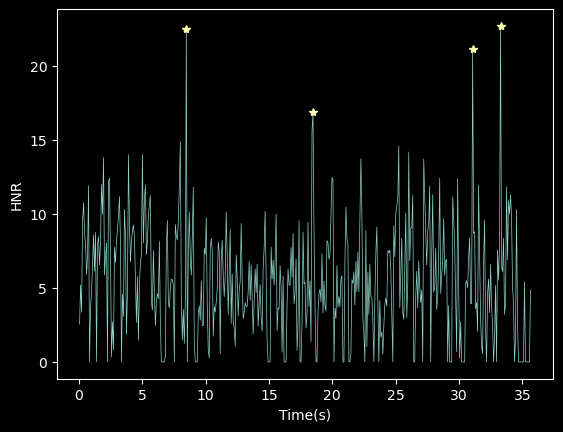

In [10]:
def HNR_peaks(audio, Fs, min_h, filename):
    tt = np.linspace(0, len(audio) / Fs, len(audio))
    fl = int(0.09 * Fs)
    frames, frames_start = split_frames(audio, fl, Fs, overlap=int(1 * fl / 8))
    tt_frames_center = tt[frames_start] + int(fl/2)/Fs
    hnr_frames = []
    for f in frames:
        hnr_frames.append(get_HNR(f, Fs, silence_threshold=0.5))
    
    peaks, peaks_prop = signal.find_peaks(
        hnr_frames,
        height=min_h,
        )
    audio_peaks = [frames[i] for i in peaks]
    path = os.path.join("output_HNRsplit/",filename)
    print(path)
    wavfile.write(path, int(Fs), stitch_frames(audio_peaks,0))
    stretch_audio(path, path, 4)
    return tt_frames_center, frames_start, hnr_frames, peaks_prop, peaks, tt

def readAudio(path, filename, cutoff):
    audio, Fs = lib.load(path, sr = None)
    path = os.path.join("wav_examples/",filename)
    wavfile.write(path, int(Fs), wavScaler(audio))
    speechToText(path)
    sos = signal.butter(4, cutoff, btype = 'high', analog = False, output='sos', fs = Fs)
    filtered = signal.sosfilt(sos,audio)
    return filtered, Fs

def speechToText(path):
    r = sr.Recognizer()
    with sr.AudioFile(path) as source:
        audio_text = r.listen(source, timeout=3)
        try:
            text = r.recognize_google(audio_text)
        except:
            pass
        print(text)

def plotPeaks(audio, frame_center, frames_start, hnr_frames, peaks_prop, peaks, tt):
    plt.figure(figsize=(15, 5))
    plt.plot(tt, audio, linewidth=1, label="signal")
    plt.xlabel("Time (s)")
    plt.plot(frame_center, hnr_frames, "*", label="HNR")
    ymin, ymax = plt.ylim()
    plt.vlines(tt[frames_start], ymin, ymax, linestyles="dashed")
    # plt.xlim(0,1.5)
    plt.legend()
    plt.show()

    #print(peaks_prop.keys())
    plt.figure()
    plt.plot(frame_center, hnr_frames)

    # mark peaks
    plt.plot(frame_center[peaks], peaks_prop["peak_heights"], "*")
    plt.xlabel("Time(s)")
    plt.ylabel("HNR")
    plt.show()

filename = ["female_turtles.wav", "alphabet.wav", "roy.wav"]
turtles, sr_turt = readAudio("wav_examples/female_turtles.wav", filename[0], 50)
alphabet, sr_alph = readAudio("wav_examples/Alphabet.wav", filename[1], 50)
roy, sr_roy = readAudio("roy.wav", filename[2], 1)

audio = [turtles, alphabet, roy]
Fs = [sr_turt, sr_alph, sr_roy]
h = [10, 15, 10]

for i in range(1,2):
    frames_center, frames_start, hnr_frames, peaks_prop, peaks, tt = HNR_peaks(audio[i], Fs[i], h[i], filename[i])
    plotPeaks(audio[i], frames_center, frames_start, hnr_frames, peaks_prop, peaks, tt)